# Ecuaciones Parciales (Continuación)

In [0]:
from IPython.display import Image

## Método de Sobrerelajación con Gauss-Seidel 

Para hacer el código más rápido, tenemos que hacer una modificación. En el código anterior, hacemos una copia de la matriz que guarda el sistema de ecuaciónes lineales a resolver. Ahora, le aplicaremos un término con un parámetro de peso:

Matriz anterior:
$$
\phi_1(x,y)=\phi(x,y)+\Delta \phi(x,y),
$$

Nueva matriz
$$
\phi(x,y)=\phi(x,y)+(1+\omega) \Delta \phi(x,y),
$$
con $\omega>0$.

Y para seguir mejorando el programa, el valor de peso será introducido a la matriz original y nos ahorraremos la copia:

$$
\phi(x,y) \leftarrow \frac{1+\omega}{4} \left[\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a) \right] -\omega \phi(x,y)
$$

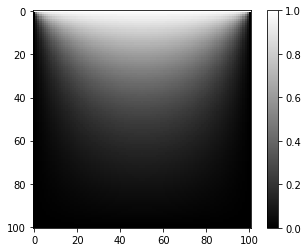

In [0]:
from pylab import *
M,V=100,1.0
# Ponemos el numero maximo de iteraciones
maxIter = 500
phi=zeros([M+1,M+1],float)
phi[0,:]=V
delta=1.0
omega=.9
for iteracion in range(0, maxIter):
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phi[i,j]=phi[i,j] #frontera
            else:
                phi[i,j] = (1+omega)*(phi[i+1,j] \
                                      + phi[i-1,j] + phi[i,j+1] \
                                      + phi[i,j-1])/4 - omega*phi[i,j]
    
imshow(phi)
gray()
colorbar()
show()

Cada problema y cada grid tendrá su propia $\omega$, i.e., no existe $\omega$ única. De los experimentos que hicimos en clase, con distintos valores de $\omega$:

1. Valores grandes de $\omega$ tienden a dar cálculos más rápidos. Aquí hay que tener cuidado, ya que el método es muy inestable y si se da un valor de $\omega$ muy grande se vuelve numéricamente inestable (aparecen números muy grandes).
2. Un valor óptimo será 0<$\omega$<2. Para el problema anterior el valor óptimo está entre 0<$\omega$<1.
3. La mejor manera de encontrar $\omega$ es con experimentación.

### Ejercicio

Hacer que el código salga del bucle una vez que la $\phi$ cambie un cierto valor $\delta$ que ustedes determinen. Imprimir el número de iteraciones final para distintas $\omega$'s. 

Ejercicio:

Consideremos la siguiente caja bidimensional con dos placas interiores:

![title](fig_4.png)

Ojo! La condición es sobre el potencial, no la densidad de carga!

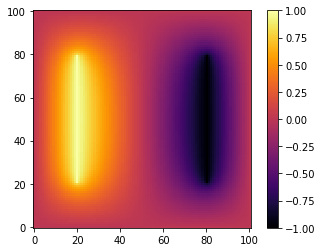

--- 11.075451850891113 segundos ---


In [0]:
from pylab import *
import time

t0 = time.time()
M,V=100,0

def V0(x,y):
    if j==20 and i>20 and i<80:
        return 1
    elif j==80 and i>20 and i<80:
        return -1
    else:
        return 0

maxIter = 500
phi=zeros([M+1,M+1],float)
epsilon=8.85e-12
omega = 0.5 #hay que jugar con la omega
for iteracion in range(0, maxIter):
    for i in range(M+1):
        for j in range(M+1):
            myV=V0(i,j)
            if i==0 or i==M or j==0 or j==M:
                phi[i,j]=V #frontera
            elif myV != 0:
                phi[i,j] = myV
            else:
                phi[i,j] = (1+omega)*(phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 \
                 -omega*phi[i,j]
   
imshow(phi,origin='lower') #origen abajo izquierda
#set_cmap("Blues_r")
set_cmap("inferno")
colorbar()
show()
print("--- %s segundos ---" % (time.time()  -  t0))

### Ejercicio

Hacer que el código salga del bucle una vez que la $\phi$ cambie un cierto valor $\delta$ que ustedes determinen. Imprimir el número de iteraciones final para distintas $\omega$'s. 

## Método de Numerov

Se usa para resolver ecuaciones diferenciales de la forma:

$ \frac{d^2 y}{dx^2} = - g(x) y(x) + s(x). $

Donde se toman 3 valores $ y_{n-1}, y_n, y_{n+1} $ usando puntos equidistantes $ x_{n-1}, x_n, x_{n+1} $. La relación entre ellos es:


$ y_{n+1} \left(1 + \frac{h^2}{12} g_{n+1}\right) = 2 y_n \left(1 - \frac{5 h^2}{12} g_n\right) - y_{n-1} \left(1 + \frac{h^2}{12} g_{n-1}\right) + \frac{h^2}{12} (s_{n+1} + 10 s_n + s_{n-1}) + \mathcal{O}(h^6),$

Donde:

$y_n = y(x_n) $, $ g_n = g(x_n)$, $ s_n = s(x_n) $ y $ h = x_{n+1} - x_n$


### Derivación


Dada la siguiente ecuación diferencial

$ y''(x) = - g(x) y(x) + s(x) $

Haciendo expansión en serie de Taylor de $ y(x) $, alrededor del punto $ x_0 $ y denotando a $h$ por $h=x - x_0$:

$$
y(x_0 + h) = y(x_0) + hy'(x_0) + \frac{h^2}{2!}y''(x_0) + \frac{h^3}{3!}y'''(x_0) + \frac{h^4}{4!}y''''(x_0) + \frac{h^5}{5!}y'''''(x_0) + \mathcal{O}(h^6)
$$

Discretizando de forma uniforme en $x$ con valores equidistantes con paso $h = x_{n+1} - x_n$, tenemos que:

$$
y_{n+1} = y_n + hy'(x_n) + \frac{h^2}{2!}y''(x_n) + \frac{h^3}{3!}y'''(x_n) + \frac{h^4}{4!}y''''(x_n) + \frac{h^5}{5!}y'''''(x_n) + \mathcal{O}(h^6)
$$

Si hacemos $h$ negativa (reemplazamos $h$ por $-h$) lo cual es equivalente a hacer un paso hacia atrás tenemos ahora una expresión para $ y_{n-1} $:

$$
y_{n-1} = y_n - hy'(x_n) + \frac{h^2}{2!}y''(x_n) - \frac{h^3}{3!}y'''(x_n) + \frac{h^4}{4!}y''''(x_n) - \frac{h^5}{5!}y'''''(x_n) + \mathcal{O}(h^6)
$$

Sumando ambas ecuaciones y notando que se eliminan los terminos con potencias impares en $h$ se obtiene:

$$
y_{n+1} - 2 y_n + y_{n-1} = h^2 y''_n + \frac{h^4}{12}y''''_n + \mathcal{O}(h^6)
$$

Tenemos que encontrar la expresión para la segunda y cuarta derivada en $y_n$ ($y''_n$, $y''''_n$), para eso usamos la expresion $ y''_n = - g_n y_n + s_n $. La diferenciamos 2 veces (dif finitas centradas):

$$
y''''_n = \frac{d^2}{d x^2} (-g_n y_n + s_n),\\
h^2 y''''_n = -g_{n+1} y_{n+1} + s_{n+1} + 2 g_n y_n - 2 s_n - g_{n-1} y_{n-1} + s_{n-1} + \mathcal{O}(h^4)
$$

Sustituyendo tenemos que:

$$
y_{n+1} - 2 y_n + y_{n-1} = {h^2} (- g_n y_n + s_n) + \frac{h^2}{12} (- g_{n+1} y_{n+1} + s_{n+1} + 2 g_n y_n - 2 s_n - g_{n-1} y_{n-1} + s_{n-1}) + \mathcal{O}(h^6)
$$

o de otra forma:

$$
y_{n+1} \left(1 + \frac{h^2}{12} g_{n+1} \right) - 2 y_n \left(1 - \frac{5 h^2}{12} g_n \right) + y_{n-1} \left(1 + \frac{h^2}{12} g_{n-1} \right) = \frac{h^2}{12} (s_{n+1} + 10 s_n + s_{n-1}) + \mathcal{O}(h^6)
$$

Si ignoramos los términos de $ h^6 $ tenemos el método de Numerov.


### Ejercicio

Escribir la ecuación diferencial para el oscilador armonico cuántico. Y encontrar los parámetros que se usaron en el código de abajo. Plotear las primeras 5 soluciones, comparar con las respectivas expresiones analíticas.

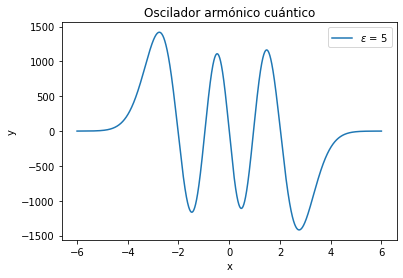

In [0]:
from pylab import *


N = 60000 # iterations

h = 0.0001
h2 = h**2

n=5 #nivel energético que queremos calcular
epsilon = n+0.5

y = 0.0 #iniciamos la variable que guarda y
g = 0.0 #iniciamos la variable que guarda g
x = -1*(N-2)*h

g_0 = epsilon + x-2*h # k_0
g_1 = epsilon + x-h # k_1
y_0 = 0 # y_0 condiciones a la frontera
y_1 = h # y_1 condiciones a la frontera de un chiqui-intervalo de tamaño h

x_lista = []
y_lista = []


contador=-1*N+2

while contador<N-2:
    contador+=1
    x += h
    g = 2*epsilon - x**2
    b = h2/12
    y = ( 2*(1-5*b*g_1) * y_1 - (1+b*g_0) * y_0 ) / (1 + b * g)

    x_lista.append(x)
    y_lista.append(y)

    #Actualizamos las variables
    y_0 = y_1
    y_1 = y
    g_0 = g_1
    g_1 = g


plot(x_lista, y_lista, label="$\epsilon$ = %d" %n)
xlabel("x")
ylabel("y")
title("Oscilador armónico cuántico")
legend()
show()

## Ecuación de calor

Tiene la forma:

$$
\frac{\partial\phi(\mathbf{r},t)}{\partial t} = D\nabla^2\phi(\mathbf{r},t)
$$

En una dimensión es:

$$
\frac{\partial\phi(x,t)}{\partial t} = D\frac{\partial^2 \phi(x,t)}{\partial x^2}
$$

### El método FTCS

FTCS = Forward-Time Centered-Space 



Si usamos diferencias finitas centradas tenemos que:

$$
\frac{\partial^2 \phi(x,t)}{\partial x^2}= \frac{\phi(x+a,t)-\phi(x-a,t)+2\phi(x,t)}{a^2}
$$

Ahora para la parte temporal usaremos Euler (dif finit tienen error $h^2$):

$$
\frac{d\phi}{d t} = f(\phi,t)
$$

$$
\phi(t+h) \approx \phi(t) + h\frac{d\phi}{d t} =  \phi(t) + h f(\phi,t)
$$

Tenemos que:

$$
\phi(x,t+h)  = \phi(x,t) + h \frac{D}{a^2} \left[\phi(x+a,t)-\phi(x-a,t)+2\phi(x,t)\right]
$$


![title](fig_5.jpg)

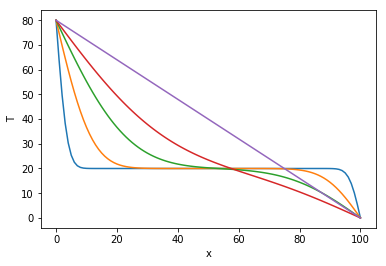

--- 5.094420433044434 segundos ---


In [0]:
from pylab import *
import time

t0 = time.time()
L=0.01
D=4.25e-6
M=100
A=L/M
h=1e-4 #pasos en el tiempo
epsilon=h/1000
T_baja=0.0
T_media=20.0
T_alta=80.0
t1=0.01
t2=0.1
t3=0.4
t4=1.0
t5=100.0
tfinal=t5+epsilon
T=empty(M+1,float)
T[0]=T_alta
T[M]=T_baja
T[1:M]=T_media
Tp=empty(M+1,float)
Tp[0]=T_alta
Tp[M]=T_baja
Tp[1:M]=T_media
t=0.0
c=h*D/(A*A)
while t<tfinal:
    Tp[1:M]=T[1:M]+c*(T[2:M+1]+T[0:M-1]-2*T[1:M])
    T,Tp=Tp,T
    t+=h
    if abs(t-t1)<epsilon:
        plot(T)
    if abs(t-t2)<epsilon:
        plot(T)
    if abs(t-t3)<epsilon:
        plot(T)
    if abs(t-t4)<epsilon:
        plot(T)
    if abs(t-t5)<epsilon:
        plot(T)
xlabel('x')
ylabel('T')
show()
print("--- %5s segundos ---" % (time.time()  -  t0))

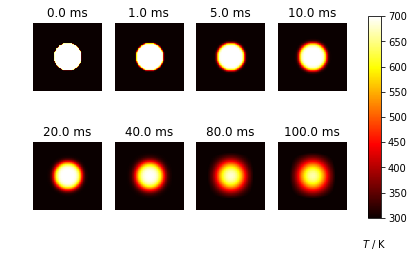

In [0]:
import numpy as np #mas eficiente está forma de importar modulos
import matplotlib.pyplot as plt 

def Geom_sis(r,cx,cy):
    r2=r**2
    for i in range(nx):
        for j in range(ny):
            p2 = (i*dx-cx)**2 + (j*dy-cy)**2
            if p2 < r2:
                u0[i,j] = Tcaliente
    return u0

def FTCS(u0, u):
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Dimensiones del plato metálico
lx = ly = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1 #1
# Thermal diffusivity of steel, mm2.s-1
D = 4.
#Temperaturas 
Tfrio, Tcaliente = 300, 700

nx, ny = int(lx/dx), int(ly/dy)

dt=1e-4
dx2, dy2 = dx*dx, dy*dy
#dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tfrio * np.ones((nx, ny))
u = np.empty((nx, ny))


u0=Geom_sis(2,5,5)
u0, u = FTCS(u0, u)

pasos = 1100
#4 figuras en la salida
mfig = [0, 10, 50, 100, 200, 400, 800, 1000]
fignum = 0
fig = plt.figure()
for i in range(pasos):
    u0, u = FTCS(u0, u)
    if i in mfig:
        fignum += 1
        #print(i,fignum)
        ax = fig.add_subplot(240 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tfrio,vmax=Tcaliente)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(i*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()
